Feature importances are provided by the fitted attribute `feature_importances_` and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

# Feature Importance in `sklearn`

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

<Axes: >

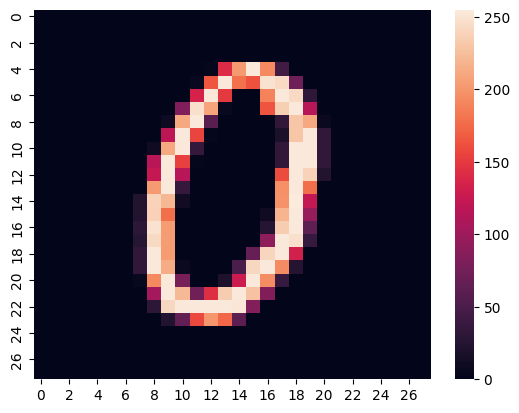

In [5]:
sns.heatmap(X.iloc[5].values.reshape(28,28))

In [7]:
random_forest = RandomForestClassifier()
random_forest.fit(X,y)

RandomForestClassifier()

In [8]:
print("Feature Importances: ", random_forest.feature_importances_)

Feature Importances:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.14494128e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4

In [9]:
print("Shape of Features Importance:", random_forest.feature_importances_.shape)

Shape of Features Importance: (784,)


<Axes: >

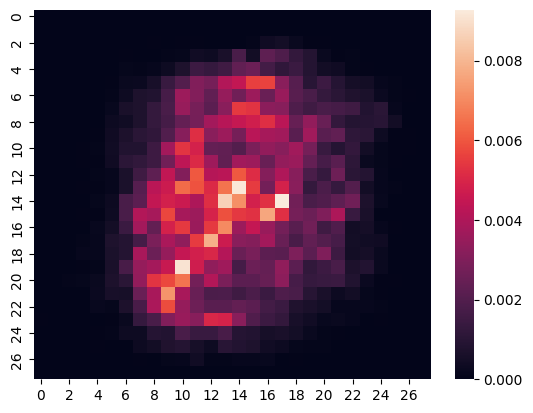

In [11]:
sns.heatmap(random_forest.feature_importances_.reshape(28,28))

# Calculation of Feature Importance

## Using Decision Tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

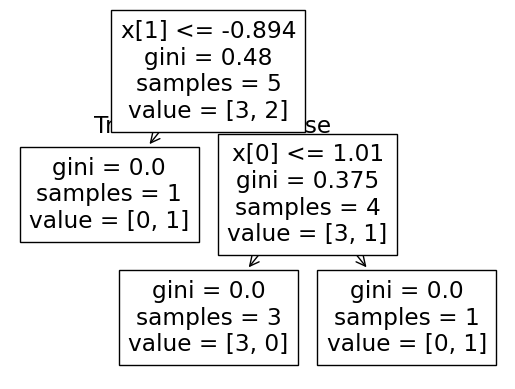

In [14]:
X,y = make_classification(
    n_samples=5,
    n_classes=2,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=0
)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,y)
plot_tree(decision_tree)

In [15]:
decision_tree.feature_importances_

array([0.625, 0.375])

## Using Random Forest

In [16]:
random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [18]:
random_forest.feature_importances_

array([0.5, 0.5])

In [19]:
print(random_forest.estimators_[0].feature_importances_)
print(random_forest.estimators_[1].feature_importances_)

print((1 + 0.555)/2)

[0. 1.]
[1. 0.]
0.7775000000000001


Impurity-based feature importances can be misleading for **high cardinality** features (many unique values). See Permutation feature importance as an alternative below.